虽然我们在本书中花了相当多的篇幅讨论效率，但目标不是让您成为设计高效程序的专家。有许多大部头的书专门讨论这个问题。

在第9章中，我们介绍了**复杂度分析**的一些基本概念。

在本章中，我们将使用这些概念来研究一些经典算法的复杂性。本章的目的是帮助你建立一些关于如何处理效率问题的一般直觉。当你读完这一章的时候，你应该明白为什么有些程序在眨眼之间就完成了，为什么有些程序需要在一夜之间运行，为什么有些程序在你的一生中都不会完成。

我们在本书中看到的第一个算法是基于强力穷举枚举的。我们讨论：**现代计算机速度如此之快，使用聪明的算法往往是浪费时间。编写简单且明显正确的代码通常是正确的做法**。

然后我们看了一些问题，比如，寻找多项式根的近似值。在这些问题中，搜索空间太大，无法使用蛮力。这促使我们考虑更有效的算法，比如二分法搜索和牛顿-拉夫森。主要的观点是，**效率的关键是一个好的算法，而不是聪明的编码技巧**。

在科学领域，比如物理、生活和社会等领域，程序员通常首先快速编写一个简单的算法来测试关于数据集的假设的可信性，然后在少量数据上运行它。如果这样做产生了令人鼓舞的结果，那么产生一个可以在大型数据集上运行(可能是反复运行)的实现的艰苦工作就开始了。这样的实现需要基于有效的算法。

高效的算法很难发明。如果幸运的话，成功的专业计算机科学家可能会在整个职业生涯中发明一种算法。我们大多数人从未发明过新的算法。

**我们所做的是学会将我们面临的问题中最复杂的方面简化为以前解决过的问题**。

具体地说，就是
- 理解问题的内在复杂度，
- 考虑如何将这个问题分解成子问题，
- 将这些子问题与已经存在有效算法的其他问题关联起来。

本章包含一些例子，目的是让你对算法设计有一些直觉。书中还出现了许多其他算法。

请记住，**最有效的算法并不总是选择的算法**。一个以最有效的方式完成所有事情的程序，通常是不必要地难于理解。

这通常是一个很好的策略：**以最直接的方式开始解决手边的问题，利用它来找到任何计算瓶颈，然后寻找方法来改进那些导致瓶颈的程序部分的计算复杂度**。

## 10.1 搜索算法
搜索算法是一种在项集合中查找具有特定属性的一个项或一组项的方法。我们将项的集合称为**搜索空间**。搜索空间可能是一些具体的东西，比如一组电子医疗记录，也可能是一些抽象的东西，比如所有整数的集合。

实践中出现的许多问题可以表述为搜索问题。

本书前面介绍的许多算法可以看作是搜索算法。在第三章中，我们将寻找多项式根的近似值表述为一个搜索问题，并研究了三种搜索可能答案空间的算法：穷尽枚举法、二分搜索法和牛顿-拉弗逊法。

在本节中，我们将研究搜索一个列表的两种算法。每个都符合下面的规范：
```
def search(L, e):
    """
    假设L是一个列表
    如果e在L中，则返回True；否则，返回False
    """
```

### 10.1 线性搜索和使用间接方式访问元素

Python使用下面的算法来判断一个元素是否在一个列表里：

In [1]:
def search(L, e):
    """
    假设L是一个列表
    如果e在L中，则返回True；否则，返回False
    """
    for i in range(len(L)):
        if L[i] == e:
            return True
    return False

分析：如果一个元素e不在列表中，则该算法将执行`O(len(L))`次测试，即复杂度是最好线性于L的长度的。为什么是最好线性？只有当在循环里的每个操作都在常数时间内完成，整体的复杂度才是线性的。这就提出了一个问题：Python是否能在常数时间内检索出一个列表的第i个元素。因为我们的模型假设：获取一个地址的内容是一个常数时间的操作，那么问题就变成了：我们是否能在常数时间内计算出一个列表中第i个元素的地址。

让我们先考虑最简单的情形，即列表中的每个元素都是一个整数。这意味着列表中的每个元素都有相同的大小，比如4个字节等。假设列表的元素是被连续存储的，那么第i个元素的地址就是`start+4*i`，其中`start`是列表的开始的地址。因此，我们可以假设Python能在常数时间内计算出整数列表中第i个元素的地址。

当然，我们知道Python的列表中可以包含非`int`的对象类型，同一个列表可包含许多具有不同大小和类型的对象。你可能认为这会导致一个问题，但是却没有。

在Python中，一个列表可表示为一个长度(在列表中对象的数量)以及一个由固定大小的对象指针组成的序列。图10.1举例说明了这些指针的使用。
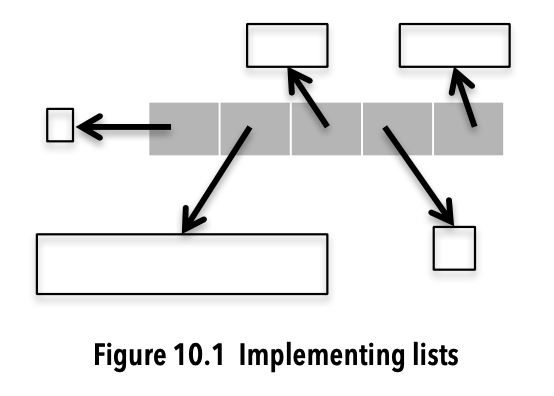
灰色区域表示包含了4个元素的列表。
最左边的灰色方格包含了一个表明列表长度的整数对象指针。其他的每个灰色方格包含了一个在列表中的对象指针。


如果长度字段占据4个单位的内存，每个指针占据4个单位的内存，则列表中第i个元素的地址被存储在地址`start+4+4*i`处。这个地址可在常数时间内被找到，然后存储在那个地址的值可被用来访问第i个元素。因此，对列表中第i个元素的访问是一个常数时间的操作。

这个例子解释了在计算中最重要的实现技术之一：间接。一般来说，间接是通过先访问别的包含有被寻找对象的引用来访问对象的。这就是每次我们使用一个变量来引用一个绑定到这个变量的对象时发生的事情。当我们使用一个变量来访问一个列表时，然后使用存在在那个列表里的一个引用来访问另一个对象，我们经历了两层间接。

### 10.1.2 二分查找和利用假设
回到`search(L,e)`的实现问题，它的最好情形复杂度是O(len(L))吗？是的，如果我们不知道列表内部元素之间的关系以及它们被存储的顺序等信息的话。在最坏情形里，我们不得不查看每个元素来决定L中是否包含e。

但是如果我们知道一些关于元素存储顺序的信息，比如我们知道一个整数列表是按照升序排列的等。我们就可以修改实现以便当它达到一个大于当前正在搜索的数时就停止。比如：

In [1]:
def search(L, e):
    """
    假设L是一个列表，它的元素按照升序排列。
    如果e在L中，则返回True，否则，返回False
    """
    for i in range(len(L)):
        if L[i] == e:
            return True
        if L[i] > e:
            return False
    return False

这会改进平均运行时间。但是，不会改变最坏情形运行时间，因为最坏情形时，L的每个元素都会被检查。

然而，通过使用二分搜索，我们可以在最坏情形复杂度方面得到相当大的改进。二分搜索算法类似于第3章中用于寻找浮点数近似平方根的二分搜索算法。在第3章，我们假设在浮点数上有一个内在的**全序**。在这里，我们假定**列表是有序的**。

思路很简单：
1. 选择一个索引i，它将列表L分成两半；
2. 检查`L(i)==e`；
3. 如果否，则检查`L[i]`比e大还是小；
4. 取决于第3步的结果，是对L的左边一半还是右边一半继续进行搜索。

基于这个算法的结构，二分搜索的大部分直接实现使用了递归，如图10.3所示：

In [2]:
def search(L, e):
    """
    假设L是一个列表，它的元素按照升序排列。
    如果e在L中，则返回True，否则，返回False
    """
    def bSearch(L,e, low, high):
        if low == high:
            return L[low] == e
        mid = (low+high)//2
        if L[mid] == e:
            return True
        elif L[mid] > e:
            if low == mid:
                return False
            else:
                return bSearch(L,e,low,mid-1)
        else:
            return bSearch(L,e,mid+1,high)
    
    if len(L) == 0:
        return False
    else:
        return bSearch(L,e,0,len(L)-1)

图10.3中的外部函数`search(L, e)`与图10.2中定义的函数具有相同的参数和规范。规范说实现可能假设`L`按升序排序。确保这个假设得到满足是搜索的调用者的责任。 如果不满足假设，则实现没有义务表现良好。 它可以工作，但也可能崩溃或返回错误答案。 是否应该修改搜索以检查假设是否满足？ 这可能会消除错误的来源，但它会破坏使用二分搜索的目的，因为检查假设本身需要`O(len(L))`时间。

像`search`这样的函数通常被称为包装函数。该函数为客户端代码提供了一个很好的接口，但本质上是一个不进行实际计算的传递函数。相反，它使用适当的参数调用辅助函数`bSearch`。这就提出了一个问题:为什么不消除`search`，让客户直接调用`bSearch`?原因是参数`low`和`high`与在列表中搜索元素的抽象没有任何关系。它们是应该对那些编写调用`search`的程序的人隐藏的实现细节。

现在让我们分析`bSearch`的复杂性。我们在上一节中展示了列表访问需要常数的时间。因此，我们可以看到，排除递归调用，`bSearch`的每个实例都是 `O(1)`。 因此，`bSearch`的复杂度仅取决于递归调用的次数。

如果这是一本关于算法的书，我们现在将使用**递推关系**进行仔细分析。 但既然不是，我们将采用一种不太正式的方法：从“**我们如何知道程序终止？**”这个问题开始。 

回想一下，在第3章中，我们问了关于`while`循环的相同问题。

我们通过为循环提供递减函数来回答这个问题。我们在这里做同样的事情。 在这种情况下，递减函数具有以下属性：
- 它将形式参数绑定到的值映射到非负整数。
- 当其值为0时，递归终止。
- 对于每次递归调用，递减函数的值小于进入调用函数实例时递减函数的值。

对于`bSearch`来说，递减函数是`high-low`。
- 性质1：将形式参数被绑定的值映射为一个非负数；

  `search`的`if`语句保证了第一次调用`bSearch`时，`high-low`至少是0。
- 性质2：当其值为0时，递归终止；

  当进入`bSearch`时，如果`high-low`为0，则函数就不做递归调用了，简单地返回`L[i]==e`的值。
- 性质3：对每个递归调用来说，递减函数的值小于在递减函数入口处做递归调用的函数实例的对应的递减函数的值；

  函数`bSearch`包含两个递归调用。一个调用使用覆盖`mid`左侧所有元素的参数，另一个调用使用覆盖`mid`右侧所有元素的参数。在任何一种情况下，`high-low`的值都会减半。

我们现在明白为什么递归终止了。

下一个问题：在`high-low == 0`之前，`high-low`的值可以减半多少次？

分析：回想一下，$\log_y(x)$是y必须乘以自身才能达到x的次数。相反，如果y被x除以$\log_y(x)$次，则结果为1。这意味着在达到0之前，可以使用整数除法将高低减为最多$\log_2(high-low)$次。

最后一个问题：二分查找的算法复杂度是多少？

分析：由于搜索调用`bSearch`时，high-low的值等于`len(L)-1`，因此搜索的复杂度为`O(log(len(L)))`.

## 10.2 排序算法
我们已看到：如果我们碰巧知道一个列表已排序，则我们可利用这份信息来极大地减少搜索一个列表所需的时间。这是否意味着：**当要求搜索一个列表时，一个人应该首先对其排序，后执行搜索？**

假设对一个列表排序的复杂度为`O(sortComplexity(L))`，已知搜索一个列表的复杂度为`O(len(L))`，问题“是否应该先对列表排序后搜索”可归结为问题“`sortComplexity(L)+log(len(L))<len(L)`”吗？答案是NO。如果查看列表中的每个元素至少一次，则就不可能对一个列表排序，所以对一个列表排序的时间复杂度不能是次线性时间。

难道这意味着：二分搜索是一个没有实际意义的求知欲的产物？答案是NO。假设一个人期望搜索一个列表多次。支付一次对列表排序的开销，然后将排序的成本分摊到多次查询上可能就很有意义。如果我们期望搜索一个列表k次，则相关的问题就变成了问题“`sortComplexity(L)+k*log(len(L))<k*len(L)`”？

随着k变大，排序列表需要的时间就变得越不相关。k需要多大取决于排序一个列表花费的时间。比如，如果排序是关于列表大小的指数级的，那么k就必须非常大。

幸运的是，排序可被相当高效地完成。比如，在Python的大部分实现里，排序的标准实现的运行时间大约为`O(n*log(n))`，其中n是列表的长度。在实践中，极少需要你实现自己的排序函数。在大多数情况里，正确的做法是或者使用Python的内置`sort`方法(`L.sort()`)或者内置函数`sorted(L)`来返回一个跟L有相同元素的列表，但没有对L进行修改。

我们在这里呈现排序算法的主要目的是提供关于算法设计和复杂度分析等方面的一些实践。

我们从选择排序(一个简单但低效的算法)开始。

如图10.4所示，选择排序的一个实现：

In [ ]:
def selSort(L):
    """
    假设L是一个可使用>来比较其元素的列表，
    将L按照升序排列
    """
    suffixStart = 0
    while suffixStart != len(L):
        #查看在后缀中的每个元素
        for i in range(suffixStart, len(L)):
            if L[i] < L[suffixStart]:
                L[suffixStart],L[i] = L[i], L[suffixStart]
        suffixStart += 1
        
L = [3,4,1,2,5]

selSort(L)

print(L)

选择排序通过维护一个循环不变量来工作。这里的循环不变量是：将列表划分为前缀`L[0:i]`和后缀`L[i+1:len(L)]`，其中前缀已排好序，在前缀中没有元素大于后缀中的最小元素。